<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polígonos de Voronoi

In [564]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.collections import LineCollection

from matplotlib.patches import Polygon

mpl.rcParams['figure.figsize'] = (13,7)

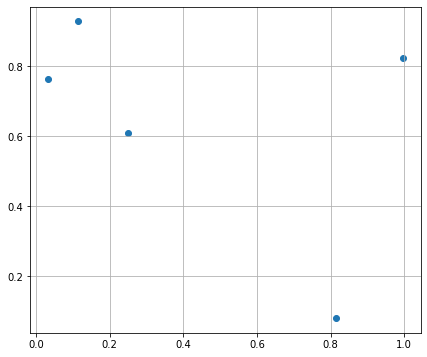

In [565]:
puntos = np.random.rand(5,2)        
plt.figure(figsize=(7,6))
plt.scatter(puntos[:,0], puntos[:,1])
plt.grid();

In [566]:
### Create Voronoi object
vor = Voronoi(puntos)

In [567]:
### Get Voronoi vertices
vor_vertices = vor.vertices
print(vor_vertices.shape)
# vor_vertices

(4, 2)


In [568]:
### Get Voronoi regions
vor_regions = vor.regions
print(vor_regions)

[[], [3, 1, 0, 2], [1, -1, 0], [2, -1, 0], [3, -1, 1], [3, -1, 2]]


<Figure size 504x504 with 0 Axes>

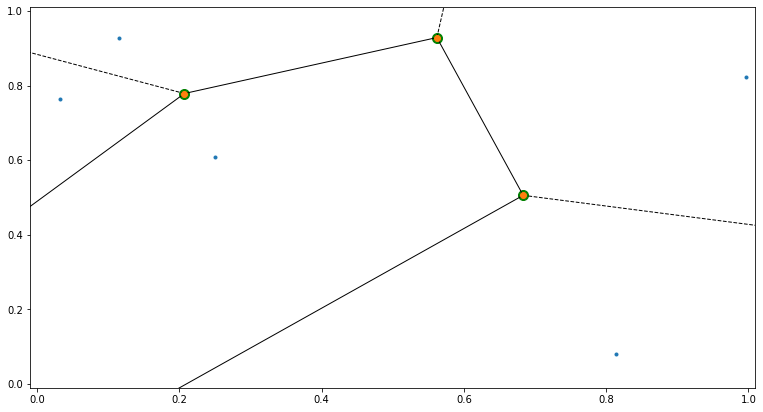

In [569]:
### Use built-in function to plot 
plt.figure(figsize=(7,7))
voronoi_plot_2d(vor)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], color="green", s=100)
plt.xlim([-0.01,1.01]); plt.ylim([-0.01,1.01])
plt.show()

In [570]:
### Get Voronoi ridge-vertices and ridge-points
print(vor.ridge_vertices)
print(vor.ridge_points)

[[0, 1], [0, 2], [1, 3], [2, 3], [-1, 0], [-1, 1], [-1, 2], [-1, 3]]
[[1 3]
 [1 2]
 [1 0]
 [1 4]
 [3 2]
 [3 0]
 [2 4]
 [0 4]]


Ahora continuamos al definir las fronteras de nuestra superficie. Como queremos que se asemeje a una estructura acinar, simulamos un medio círculo interior y exterior.

\begin{align}
    \alpha(r, \theta) = r,\qquad\ \theta\in{\{0, \pi\}},\quad  r=\{1, 2\}
\end{align}

\begin{align}
    x &= r\cos\theta,\quad &y &= r\sin\theta\\
    \Rightarrow r &= \sqrt{x^2+y^2},\quad &\theta &= \arctan\left(\frac{y}{x}\right)
\end{align}

In [571]:
### parámetros
tol = 0.001; n_space = 200
theta = np.linspace(tol, np.pi-tol, n_space);
r = np.array([1.0 + tol, 2.0 - tol]);

### funciones
alpha_x = lambda r, theta: r*np.cos(theta);
alpha_y = lambda r, theta: r*np.sin(theta);

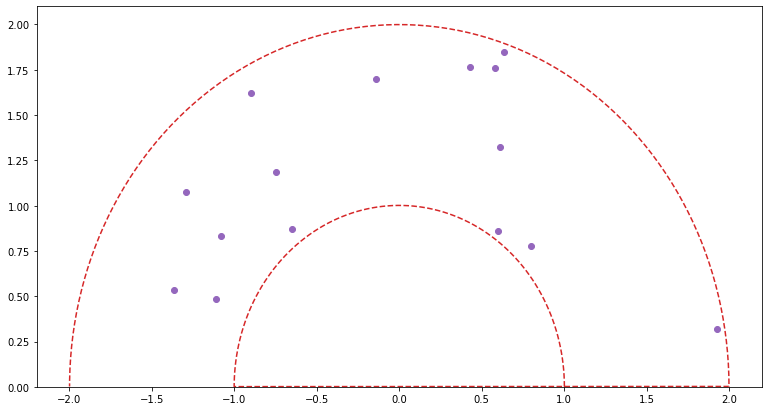

In [572]:
N = 15;
X_border, Y_border = [], []
for i in range(len(r)):
    X_border.append(alpha_x(r[i], theta))
    Y_border.append(alpha_y(r[i], theta))

X_border = np.array(X_border).flatten()
Y_border = np.array(Y_border).flatten()
pts_border = np.array([X_border, Y_border]).T

#----------------------------------------
r_rand     = np.random.rand(N) * abs(r[-1]-r[0]) + r[0]
theta_rand = np.random.rand(N) * abs(theta[-1]-theta[0]) + theta[0]

X_rand = alpha_x(r_rand, theta_rand)
Y_rand = alpha_y(r_rand, theta_rand)
pts_rand = np.array([X_rand, Y_rand]).T

#----------------------------------------
X_base = np.linspace(-r[1], r[1], n_space).flatten()
Y_base = np.zeros(n_space).flatten()-0.1
pts_base = np.array([X_base, Y_base]).T

#----------------------------------------

plt.scatter(X_rand, Y_rand, color="tab:purple")
plt.plot(X_border, Y_border, "--", color="tab:red");
plt.plot(X_base, Y_base, "--", color="tab:red"); 
plt.ylim([0.0,2.1]); plt.show()

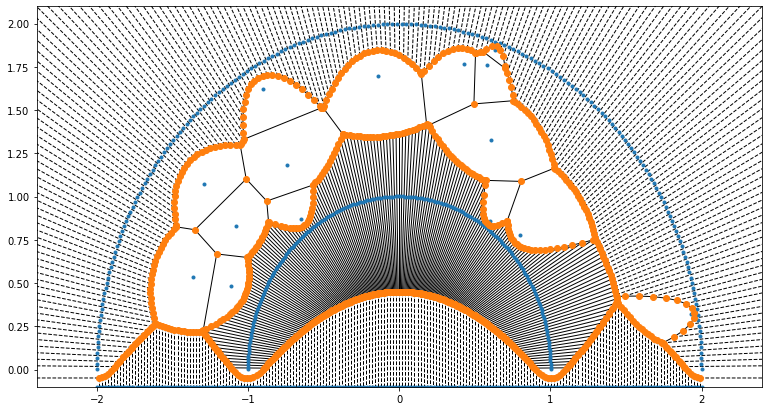

<Figure size 1080x504 with 0 Axes>

In [573]:
total = np.concatenate((pts_rand, pts_border, pts_base))
vor = Voronoi(total)
vor_vertices = vor.vertices
vor_regions = vor.regions

voronoi_plot_2d(vor)
plt.ylim([-0.1,2.1])
plt.figure(figsize=(15,7))
plt.show()

(-0.1, 2.0)

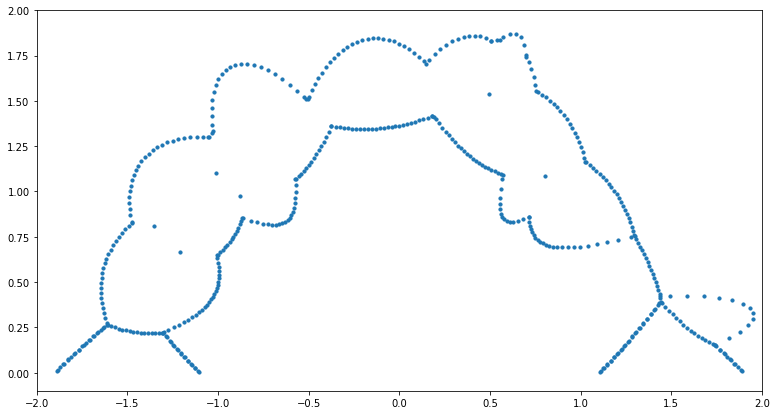

In [574]:
vor_vertices = vor_vertices[np.where(vor_vertices[:,1] >= 0)]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) >=r[0])]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) <=r[1])]
# hull = ConvexHull(vor_vertices)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], s=10)
plt.xlim([-2,2]); plt.ylim([-0.1,2])

*   ###  __Paso $N+1$:__ _Encontrando y discriminando las regiones de Voronoi_



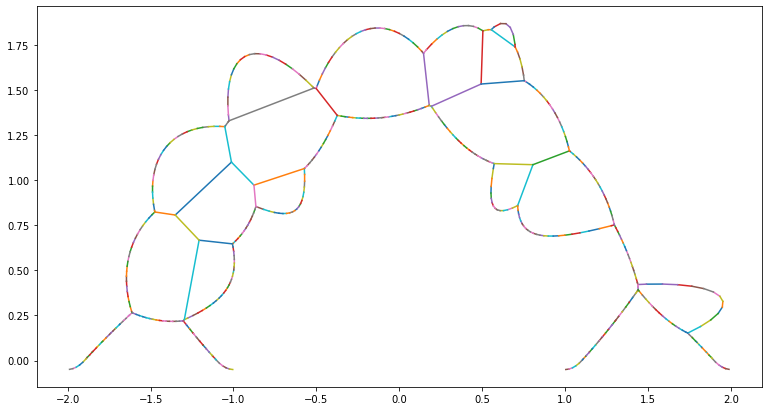

In [575]:
finite_segments = []
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        finite_segments.append(vor.vertices[simplex])

for i in range(len(finite_segments)):
    x_line = finite_segments[i][:,0]
    y_line = finite_segments[i][:,1]
    r_line = (x_line**2 + y_line**2)**(1/2)
    if (np.min(r_line)>= r[0]-tol) and (np.max(r_line)<= r[1]+tol) and (np.min(y_line) >= -0.15):
        plt.plot(x_line, y_line)

In [576]:
def get_polygons(vor):
    Polygons = []
    for i in range(len(vor.regions)):
        if (not -1 in vor.regions[i]) and (len(vor.regions[i]) >=1):
            x_ = np.array([vor.vertices[k][0] for k in vor.regions[i]])
            y_ = np.array([vor.vertices[k][1] for k in vor.regions[i]])
            r_ = (x_**2+y_**2)**(1/2)
            if (np.min(r_) >= r[0] - tol) and (np.max(r_) <= r[1] + tol):
                polygon = np.array([vor.vertices[k] for k in vor.regions[i]])
                Polygons.append(np.array([*zip(*polygon)]))
    return Polygons

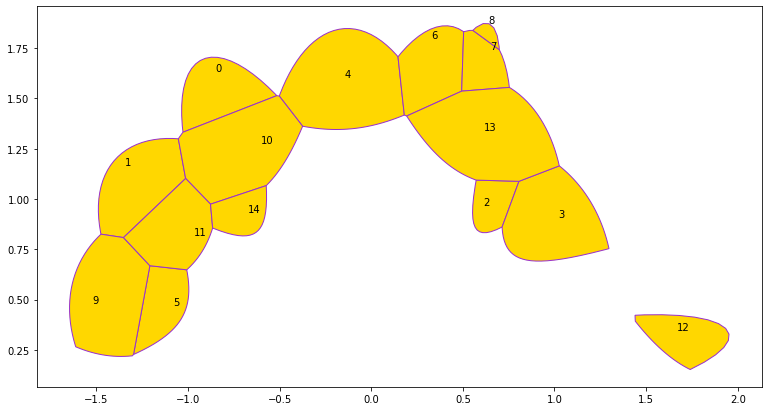

In [577]:
### make up data points
points = np.random.rand(15,2)

### compute Voronoi tesselation
vor = Voronoi(total)

### get Voronoi regions
Polygons = get_polygons(vor)

### visualize Voronoi regions
for i in range(len(Polygons)):
    polygon = Polygons[i]
    X, Y = polygon
    plt.text(np.mean(X), np.mean(Y) + 0.05, f"{i}")
    plt.fill(X, Y, edgecolor="darkorchid", facecolor="gold")
plt.show()

In [578]:
len(Polygons)           # Número de polígonos guardados (coincide con el número de puntos dados)
# x[i] -> Polygons[i][0]
# y[i] -> Polygons[i][1]

15


*   ###  __Paso $N+2$:__ _Calculando el área y el centroide de un polígono_

\begin{align}
    A &= \frac{1}{2}\sum_{i=0}^{N-1} (x_iy_{i+1}-x_{i+1}y_i)
\end{align}

Y para el cálculo de las coordenadas del centro de masas en 2D tenemos las siguientes ecuaciones

\begin{align}
    C_x &= \frac{1}{6A}\sum_{i=0}^{N-1}(x_i+x_{i+1})(x_iy_{i+1}-x_{i+1}y_i) \\
    C_y &= \frac{1}{6A}\sum_{i=0}^{N-1}(y_i+y_{i+1})(x_iy_{i+1}-x_{i+1}y_i)
\end{align}

Para mayor información puede consultar el siguiente enlace: [Calculating the area and centroid of a polygon. By Paul Bourke](https://lexrent.eu/wp-content/uploads/torza/artikel_groep_sub_2_docs/BYZ_3_Polygon-Area-and-Centroid.pdf)

-----

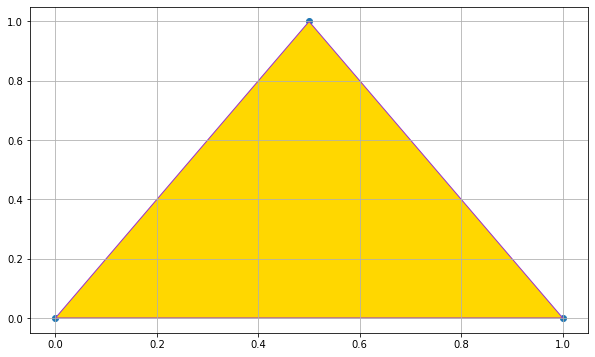

In [579]:
x_prueba = np.array([0,1,0.5])
y_prueba = np.array([0,0,1])

polygon_prueba = np.array([x_prueba, y_prueba])

plt.figure(figsize=(10,6))
plt.scatter(x_prueba, y_prueba); plt.fill(x_prueba, y_prueba, edgecolor="darkorchid", facecolor="gold")
plt.grid()

In [580]:
def get_area(polygon):
    n_area = polygon.shape[1]
    X, Y = polygon
    S = np.empty(n_area)
    
    for i in range(n_area):
        S[i] = X [i]*Y[(i+1) % n_area] - X[(i+1) % n_area]*Y[i]
    return abs((1/2)*np.sum(S))

get_area(polygon_prueba)

0.5

In [581]:
def area_voronoi(Polygons):
    S = np.empty(len(Polygons))

    for i in range(len(S)):
        S[i] = get_area(Polygons[i])
    return S

area_voronoi(Polygons)

array([0.11439361, 0.1535948 , 0.04909301, 0.19392622, 0.26108005,
       0.08319404, 0.11921263, 0.05822886, 0.00888946, 0.20510549,
       0.2292663 , 0.13345974, 0.08802792, 0.26638456, 0.05494869])

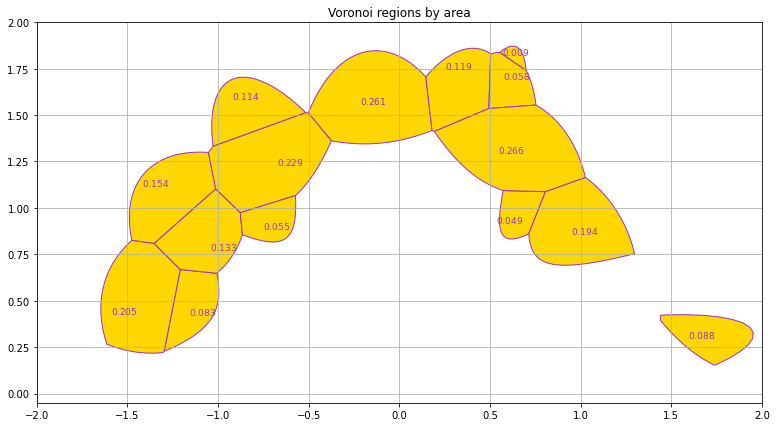

In [582]:
A_vor = area_voronoi(Polygons)

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    plt.text(np.mean(X), np.mean(Y), f'${num_label}$', fontsize=9, horizontalalignment='center', color='darkorchid', fontweight='bold')
    plt.fill(X, Y, edgecolor="darkorchid", facecolor="gold")

plt.title("Voronoi regions by area")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.05, 2.0])
plt.grid()

---

Ahora se calcula el centroide de cada polígono

In [583]:
def get_centroid(polygon, tol = 0.05):
    n_centroid = polygon.shape[1]
    X, Y = polygon
    CX, CY = np.empty([2, n_centroid])
    A = get_area(polygon)
    
    for i in range(n_centroid):
        CX[i] = (X[i] + X[(i+1) % n_centroid]) * (X[i] * Y[(i+1) % n_centroid] - X[(i+1) % n_centroid]*Y[i])
        CY[i] = (Y[i] + Y[(i+1) % n_centroid]) * (X[i] * Y[(i+1) % n_centroid] - X[(i+1) % n_centroid]*Y[i])
     
    cX, cY = (np.sum(CX), np.sum(CY))/(6*A) 
    if abs(cX - np.mean(X)) > abs(-cX - np.mean(X)):
        cX = -cX
    if abs(cY - np.mean(Y)) > abs(-cY - np.mean(Y)):
        cY = -cY
    return cX, cY

get_centroid(polygon_prueba)

(0.5, 0.3333333333333333)

In [584]:
def centroid_voronoi(Polygons):
    C = np.empty([2, len(Polygons)])
    for i in range(C.shape[1]):
        C[:,i] = get_centroid(Polygons[i])
    return C

centroid_voronoi(Polygons)

array([[-0.82918162, -1.26858886,  0.65954301,  0.98783625, -0.14310366,
        -1.14127986,  0.32945257,  0.60553101,  0.63729932, -1.43380836,
        -0.71932569, -1.07416381,  1.7112786 ,  0.63542113, -0.71205931],
       [ 1.53297643,  1.07201622,  0.97573671,  0.89751413,  1.57742245,
         0.47265006,  1.64964028,  1.66725569,  1.81923993,  0.50964181,
         1.24427023,  0.84712805,  0.31272123,  1.31678674,  0.92964687]])

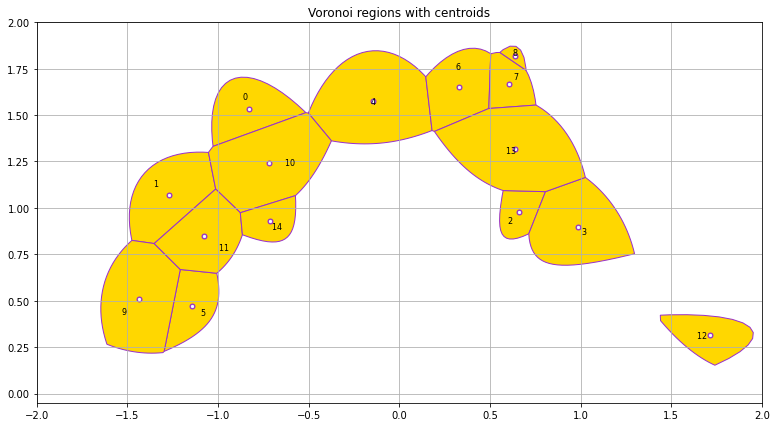

In [585]:
C_vor = centroid_voronoi(Polygons);

fig, ax = plt.subplots();

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(get_area(Polygons[i]), 3)
    plt.text(np.mean(X), np.mean(Y), f'${i}$', fontsize=8, horizontalalignment='center', color='black', fontweight='bold')
    ax.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")
ax.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=1, s=25)
ax.scatter(C_vor[0], C_vor[1], color="azure", zorder=2, s=5)

plt.title("Voronoi regions with centroids")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.05, 2.0])
plt.grid()

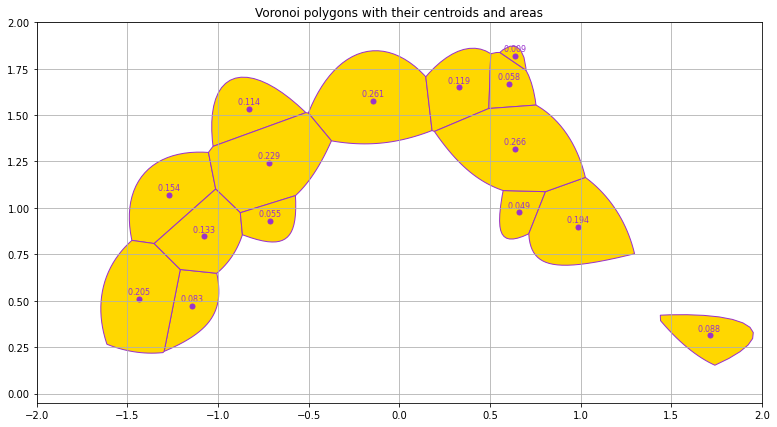

In [586]:
A_vor = area_voronoi(Polygons);
C_vor = centroid_voronoi(Polygons);

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    plt.text(C_vor[0,i], C_vor[1,i]+0.025, f'${num_label}$', fontsize=8, horizontalalignment='center', color='darkorchid', fontweight='bold', zorder=1)
    plt.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")

plt.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=-1, s=25); ax.scatter(C_vor[0], C_vor[1], color="azure", zorder=0, s=5)
plt.title("Voronoi polygons with their centroids and areas")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.05, 2.0])
plt.grid()

*   ###  __Paso $N+3$:__ _Definiendo las interacciones y evolución del sistema a partir del potencial $V(\vec{x},t)$_

\begin{align}
    V(\vec{r_i}, t) = \frac{K_v}{2}\left(A_i(t)-A_0(t)\right)^2 + \frac{K_c}{2}\big|\vec{r}_i(t) - \vec{r}_{0,i}(t)\big|^2 
\end{align}

donde $A_0 = \sum_{i=1}^N(A_i/N)$

[Cell Patterns Emerge from Coupled Chemical and Physical Fields with Cell Proliferation Dynamics: The Arabidopsis thaliana Root as a Study System](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3642054/)

\begin{align}
    A_{1/2,dona} &= \frac{\pi}{2} \left(r_{max}^2-r_{min}^2\right)\\
    \Rightarrow A_0 &= \lim_{t\to\infty} A_i(t)=\frac{A_{1/2,dona}}{N_{reg}} = \frac{\pi}{2N} \left(r_{max}^2-r_{min}^2\right)
\end{align}

In [587]:
A_dona = (np.pi/2)*(r[1]**2 - r[0]**2)
A_0 = A_dona/len(Polygons)
A_0

0.31353094682826144

In [588]:
K_v, K_c = 1, 1

# (K_v/2)*(A_vor-A_0)**2                # evolución estática
(K_v/2)*(A_vor-np.mean(A_vor))**2    # evolución dinámica

array([2.03886976e-04, 1.80647701e-04, 3.65461300e-03, 1.76056982e-03,
       8.00024273e-03, 1.32061941e-03, 1.18185966e-04, 2.91528456e-03,
       7.89993915e-03, 2.48642698e-03, 4.48208197e-03, 6.35389929e-07,
       1.08387517e-03, 8.68529557e-03, 3.17113225e-03])

In [589]:
def dist_vor(pts_vor, C_vor):
    dist, index = [], []
    for i in range(len(pts_vor)):
        s = pts_rand[i].reshape([2,1])
        dist.append(np.min(np.sum((C_vor - s)**2, axis=0)))
        index.append(np.argmin(np.sum((C_vor - s)**2, axis=0)))

    return np.array(dist), np.array(index), 

dist_vor(pts_rand, C_vor)[1]

array([ 4, 14,  5,  9,  3, 10,  1,  0,  8,  8,  2, 13,  6, 11, 12])

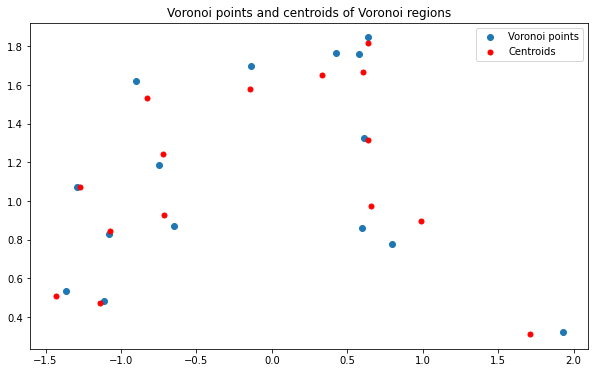

In [590]:
plt.figure(figsize=(10,6))
plt.scatter(pts_rand.T[0],pts_rand.T[1], label="Voronoi points")
plt.scatter(C_vor[0], C_vor[1], color="red", s=25, label="Centroids")
plt.title("Voronoi points and centroids of Voronoi regions"); plt.legend()

In [591]:
K, A_0 = [1, 1], (np.pi/2)*(r[1]**2 - r[0]**2)/len(Polygons)

def potential_vor(K, pts_vor, A_vor, C_vor):
    V = np.empty(len(pts_vor))
    dist, index = dist_vor(pts_vor, C_vor)

    # v1 = ((K[0]/2)*(A_vor-A_0)**2)[index]               # evolución estática
    v1 = ((K[0]/2)*(A_vor-np.mean(A_vor))**2)[index]
    v2 = (K[1]/2)*dist
    return v1 + v2

potential_vor(K, pts_rand, A_vor, C_vor)

array([0.01537684, 0.00677569, 0.0017618 , 0.00516273, 0.02659357,
       0.00657849, 0.00043727, 0.00679005, 0.01137734, 0.00826019,
       0.01216887, 0.00907131, 0.01164429, 0.00016524, 0.02463156])

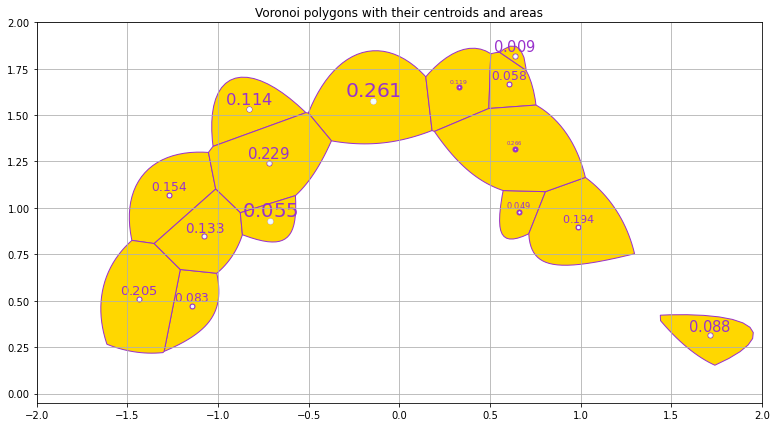

In [592]:
V_vor = potential_vor(K, pts_rand, A_vor, C_vor)

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    plt.text(C_vor[0,i], C_vor[1,i]+0.025, f'${num_label}$', fontsize=np.sqrt(V_vor[i])*100+4, horizontalalignment='center', color='darkorchid', fontweight='bold', zorder=1)
    plt.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")
    plt.scatter(C_vor[0,i], C_vor[1,i], color="azure", zorder=0, s=V_vor[i]*1000)

plt.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=-1, s=25); 
plt.title("Voronoi polygons with their centroids and areas")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.05, 2.0])
plt.grid()

\begin{align}
    F_x(x_i, t) = &-\frac{K_v}{2}\left[\frac{1}{2}\sum_{m=1}^{M} \frac{(x_i-x_m)\cdot l_{i,m}}{|\vec{r}_i-\vec{r}_m|}\{A_i - A_0\}\right]\\
                  &- K_c(x_i-x_{0,i})\\
    F_y(y_i, t) = &-\frac{K_v}{2}\left[\frac{1}{2}\sum_{m=1}^{M} \frac{(y_i-y_m)\cdot l_{i,m}}{|\vec{r}_i-\vec{r}_m|}\{A_i - A_0\}\right]\\
                  &- K_c(y_i-y_{0,i})  
\end{align}

In [593]:
def get_lines(vor):
    line_segments, line_regions = [], []
    for simplex, pointidx in zip(vor.ridge_vertices, vor.ridge_points):
        if -1 not in simplex:
            pointidx = np.asarray(pointidx)
            simplex = np.asarray(simplex)
            if np.all(pointidx <= len(pts_rand)-1):
                line_segments.append(vor.vertices[simplex])
                line_regions.append(pointidx)
    line_segments = np.array(line_segments)
    line_regions = np.array(line_regions)
    return line_segments, line_regions

get_lines(vor)[0], get_lines(vor)[1]

(array([[[-0.51513898,  1.51306727],
         [-1.02683338,  1.33142996]],
 
        [[-1.01239724,  1.10160858],
         [-1.05221213,  1.29879452]],
 
        [[-1.01239724,  1.10160858],
         [-1.35145287,  0.80797645]],
 
        [[-1.35145287,  0.80797645],
         [-1.47430084,  0.82483856]],
 
        [[ 0.80626401,  1.08752075],
         [ 0.57276057,  1.09348154]],
 
        [[ 0.80626401,  1.08752075],
         [ 0.7140958 ,  0.86034788]],
 
        [[ 0.80626401,  1.08752075],
         [ 1.02616925,  1.16432657]],
 
        [[-0.50135647,  1.51093863],
         [-0.37407668,  1.36117132]],
 
        [[ 0.14622731,  1.70620135],
         [ 0.18079446,  1.41677283]],
 
        [[-1.29657184,  0.22718335],
         [-1.20752305,  0.66817421]],
 
        [[-1.00629685,  0.64779909],
         [-1.20752305,  0.66817421]],
 
        [[ 0.49370532,  1.53552139],
         [ 0.50437905,  1.83073752]],
 
        [[ 0.49370532,  1.53552139],
         [ 0.19366635,  1.41191122]],
 

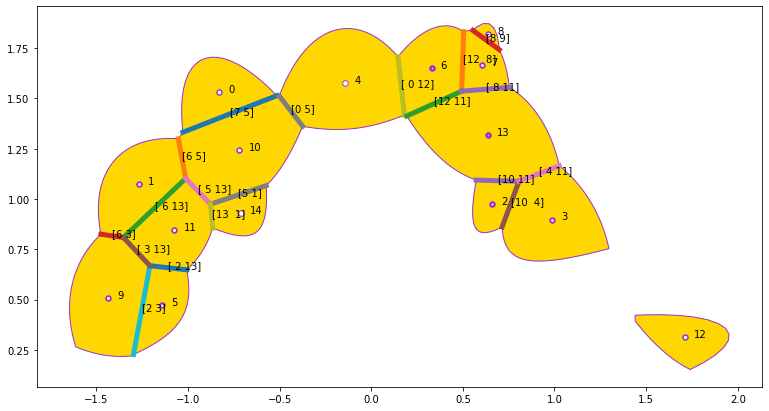

In [594]:
Line_segments, Line_regions = get_lines(vor)

### Plot shared lines 
for i in range(len(Line_segments)):
    line_segment = Line_segments[i]
    x_line = line_segment[:,0]
    y_line = line_segment[:,1]
    plt.plot(x_line, y_line, linewidth=5)
    plt.text(np.mean(x_line), np.mean(y_line), f"{Line_regions[i]}", color="black", zorder=2)

### Visualize Voronoi regions
for i in range(len(Polygons)):
    X, Y = Polygons[i]
    plt.fill(X, Y, zorder=-2, edgecolor="darkorchid", facecolor="gold")
    plt.text(C_vor[0,i]+0.05, C_vor[1,i], f"{i}", color="black", zorder=0)
    plt.scatter(C_vor[0,i], C_vor[1,i], color="azure", zorder=0, s=V_vor[i]*500)
plt.scatter(C_vor[0], C_vor[1], color="darkorchid", zorder=-1, s=30); 

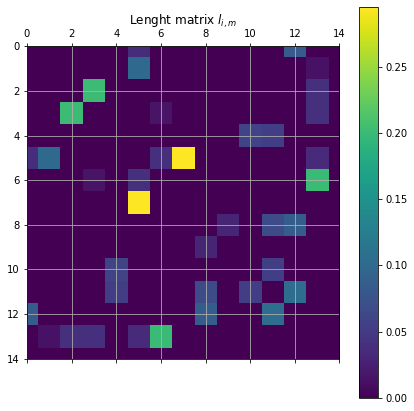

In [595]:
s = (len(Polygons), len(Polygons))
empty_matrix = np.zeros(s)
for k in range(len(Line_regions)):
    i, m = Line_regions[k]
    # print(i, m)
    d = np.sum((Line_segments[k][0]-Line_segments[k][1])**2)
    empty_matrix[i,m] += d
    empty_matrix[m,i] += d

plt.matshow(empty_matrix);
plt.xlim([0,len(Polygons)-1]); plt.ylim([len(Polygons)-1,0]);
plt.title("Lenght matrix $l_{i,m}$"); plt.colorbar(); plt.grid()

In [596]:


### dictionary of neighbor ridges by region
def get_neighbor_regions(Line_regions):
    neighbor_regions = [[] for i in range(np.max(Line_regions)+1)]
    for line_region in Line_regions:
        a, b = line_region
        neighbor_regions[a].append((a,b))
        neighbor_regions[b].append((a,b))
    return neighbor_regions

get_neighbor_regions(Line_regions)

[[(0, 5), (0, 12)],
 [(5, 1), (13, 1)],
 [(2, 3), (2, 13)],
 [(6, 3), (2, 3), (3, 13)],
 [(10, 4), (4, 11)],
 [(7, 5), (6, 5), (0, 5), (5, 13), (5, 1)],
 [(6, 5), (6, 13), (6, 3)],
 [(7, 5)],
 [(12, 8), (8, 9), (8, 11)],
 [(8, 9)],
 [(10, 11), (10, 4)],
 [(10, 11), (4, 11), (12, 11), (8, 11)],
 [(0, 12), (12, 8), (12, 11)],
 [(6, 13), (2, 13), (3, 13), (5, 13), (13, 1)]]

In [597]:
points_temp = set()
for i in range(len(Neighbor_regions[1])):
    points_temp.add(Neighbor_regions[1][i])

points_temp

{(1, 5)}

In [598]:
Neighbor_regions = get_neighbor_regions(Line_regions)

vor_lenghts= np.empty([len(Neighbor_regions), len(Neighbor_regions)]);
for i in range(len(Neighbor_regions)):
    for j in range(len(Neighbor_regions[i])):
        # print(i, Neighbor_regions[i][j]) 
        a, b = Neighbor_regions[i][j]
        if a == i:
            a, b = b, a
        # print(i, j, a, vor_vertices[a])
        # print("   ",b, vor_vertices[b])
        # print("             ", np.sum(abs(vor_vertices[a] - vor_vertices[b])))
        vor_lenghts[i][j] += np.sum(abs(vor_vertices[a] - vor_vertices[b]))
        # line_pos[i] = 
print(np.matrix(vor_lenghts))
# vor_lenghts        

[[2.39464220e-001 3.27794173e+000 6.89879171e-310 6.89875399e-310
  6.89879170e-310 6.89879170e-310 6.89876547e-310 6.89879174e-310
  6.89879170e-310 6.89879170e-310 6.89879171e-310 6.89875399e-310
  6.89879170e-310 6.89879170e-310]
 [1.59328486e+000 4.52277044e-001 6.89879171e-310 6.89879170e-310
  6.89879173e-310 6.89879170e-310 6.89879171e-310 6.89879171e-310
  6.89875399e-310 6.89879170e-310 6.89879170e-310 6.89875399e-310
  6.89879174e-310 6.89879170e-310]
 [7.23685915e-003 2.42812556e+000 6.89875397e-310 6.89879170e-310
  6.89879170e-310 6.89875397e-310 6.89879174e-310 6.89879171e-310
  6.89879170e-310 6.89879173e-310 6.89879170e-310 6.89879171e-310
  6.89879171e-310 6.89875397e-310]
 [1.89728580e+000 7.23685915e-003 2.43536242e+000 6.89879174e-310
  6.89879170e-310 6.89879170e-310 6.89879171e-310 6.89875397e-310
  6.89879170e-310 6.89879170e-310 6.89875397e-310 6.89879174e-310
  6.89879171e-310 6.89879170e-310]
 [5.43738326e-001 5.42843975e-001 6.89879171e-310 6.89879171e-310
  